In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
from medvqa.utils.files import load_pickle

In [24]:
!python ../scripts/mscxr/precompute_phrase_embeddings.py \
--model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)"

len(phrases): 715
Obtaining embeddings for each phrase...
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
  0%|                                                   | 0/715 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=440,3465006188639683439).pkl
len(self.cache["hashes"]) = 4766841
self.cache["embeddings"].shape = (4766841, 128)
100%|████████████████████████████████████████| 715/715 [00:06<00:00, 106.17it/s]
Computing embeddings for 513 new texts
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specializ

In [26]:
# --checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
# --checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231201_095118_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
# --checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231205_232713_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
# --checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231206_112155_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
!python ../eval_phrase_grounding.py \
--checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)" \
--max_images_per_batch 100 \
--max_phrases_per_batch 2000 \
--max_phrases_per_image 30 \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding(hash=36521,3206715123524916204).pkl" \
--eval_mscxr

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)
   max_images_per_batch: 100
   max_phrases_per_batch: 2000
   max_phrases_per_image: 30
   num_workers: 0
   device: GPU
   mscxr_phrase2embedding_filepath: /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding(hash=36521,3206715123524916204).pkl
   eval_chest_imagenome_gold: False
   eval_mscxr: True
----- Evaluating model -----
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)/metadata.json
--------------------------------------------------
1) device = cuda
--------------------------------------------------
2) Creating instance of PhraseGrounder ...
MultiPurposeVisualModule()
  Initializing raw_image_encoder: densenet-121
create_densen

In [27]:
# tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20231201_095118_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)/mscxr_metrics.pkl')
# tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20231205_232713_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)/mscxr_metrics.pkl')
# tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20231206_112155_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)/mscxr_metrics.pkl')
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)/mscxr_metrics.pkl')

In [28]:
tmp.keys()

dict_keys(['image_paths', 'phrases', 'pred_masks', 'gt_masks', 'ious', 'pg_segmask_iou'])

In [29]:
import numpy as np

In [30]:
idxs = np.argsort(tmp['ious'])[::-1]

In [31]:
for i in range(10):
    print(tmp['ious'][idxs[i]], tmp['phrases'][idxs[i]])

0.6214768886566162 patchy bilateral consolidation and ground-glass opacities
0.6006837487220764 bilateral edema, consolidation, ground-glass opacities
0.6004878878593445 there is patchy perihilar consolidation
0.5869180560112 bilateral patchy consolidation and ground-glass opacities
0.5708286762237549 Right upper lung opacity is also most likely postsurgical
0.5691506266593933 diffuse pulmonary opacities likely represent pulmonary edema
0.5687646865844727 right-sided hydro pneumothorax
0.5646910667419434 there is diffuse consolidation and ground-glass opacities
0.5629748106002808 Diffuse bilateral alveolar opacities, given history, consistent with significant fluid overload; suggest repeat radiograph after diuresis to further evaluate for additional underlying process
0.5563659071922302 moderate right apical lateral pneumothorax


In [39]:
i = 1000
print(tmp['ious'][idxs[i]])
print()
print(tmp['image_paths'][idxs[i]])
print()
print(tmp['phrases'][idxs[i]])

dicom_id = tmp['image_paths'][idxs[i]].split('/')[-1].split('.')[0]

0.05986260622739792

/mnt/workspace/mimic-cxr-jpg/images-medium(512)/p10/p10441044/s50287757/44aa97f1-0ef2d266-8c0f3c7d-c3d33c38-36619b2f.jpg

Left-sided pneumothorax


In [9]:
%run -n ../datasets/ms_cxr/__init__.py

In [10]:
pgav = PhraseGroundingAnnotationsVisualizer()

Found 1 rows for dicom_id 44aa97f1-0ef2d266-8c0f3c7d-c3d33c38-36619b2f
Image path: /mnt/data/mimic-cxr-jpg/images/p10/p10441044/s50287757/44aa97f1-0ef2d266-8c0f3c7d-c3d33c38-36619b2f.jpg
Label text: Left-sided pneumothorax
Category name: Pneumothorax
x: 1920, y: 1714, w: 940, h: 454


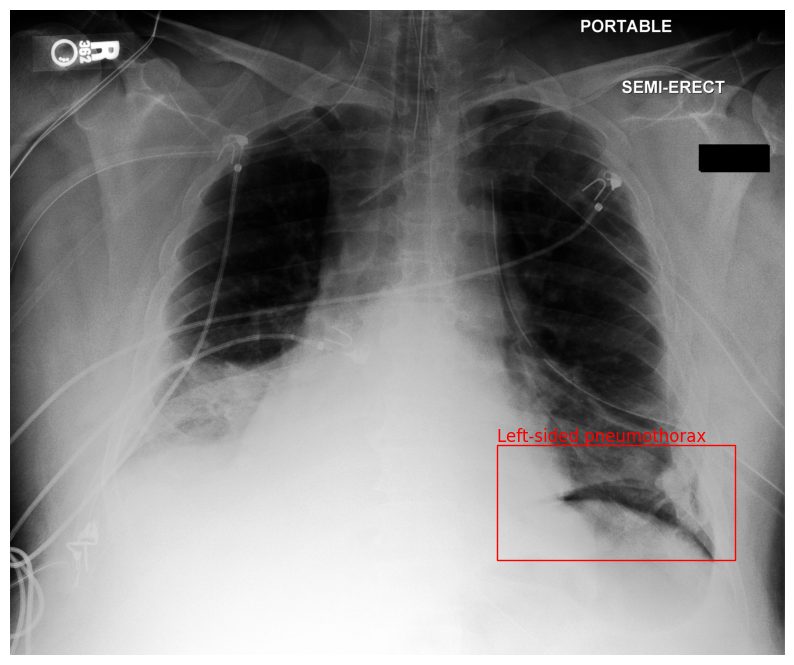

In [40]:
pgav.visualize_dicom_id(dicom_id)

In [12]:
%run -n ../evaluation/plots.py

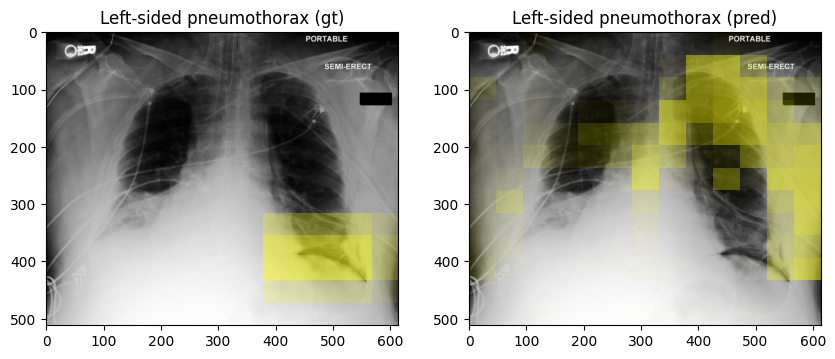

In [41]:
visualize_attention_maps(
    image_path=tmp['image_paths'][idxs[i]],
    figsize=(10,10),
    attention_factor=0.5,
    attention_maps=[
        tmp['gt_masks'][idxs[i]].reshape(13,13),
        tmp['pred_masks'][idxs[i]].reshape(13,13),
    ],
    titles=[
        f"{tmp['phrases'][idxs[i]]} (gt)",
        f"{tmp['phrases'][idxs[i]]} (pred)",
    ],
)